In [1]:
# check against experimental data

In [1]:
import os
import numpy as np
import pandas as pd
import cantera as ct

import matplotlib.pyplot as plt
%matplotlib inline

$C_4H_{10} + \frac{13}{2}O_2 \leftrightharpoons 4CO_2 + 5H_2O\$

In [2]:
# load the experimental conditions
flame_speed_data = '/work/westgroup/harris.se/autoscience/autoscience/butane/experimental_data/butane_flamespeeds.csv'
df_exp = pd.read_csv(flame_speed_data)

# get just the Park data
data_slice = df_exp[df_exp['Reference'] == 'Park et al. 2016']

# Define Initial conditions using experimental data
speeds = data_slice['SL0 (cm/s)'].values.astype(float)  # ignition delay
temperatures = data_slice['Tu (K)'].values  # Temperatures
pressures = data_slice['Pu (atm)'].values * ct.one_atm  # pressures in atm
equiv_ratios = data_slice['Equivalence Ratio'].values  # equivalence ratio


# list of starting conditions
# Define stoichiometric coefficients
v_fuel = 1.0
v_oxidizer = 13.0 / 2.0
v_N2 = 0.79 * (v_oxidizer / 0.21)  # air is approximately 79% N2 and 21% O2

# calculate actual ratio of fuel to oxidizer
actual_ratio = equiv_ratios * (v_fuel / v_oxidizer)


# start with 1.0 oxidizer, then normalize
x_O2 = 1.0
x_C4H10 = actual_ratio * x_O2
x_N2 = 0.79 * (x_O2 / .21)
total = x_O2 + x_C4H10 + x_N2
x_O2 = x_O2 / total
x_C4H10 = x_C4H10 / total
x_N2 = x_N2 / total

concentrations = [{'butane(1)': x_C4H10[i], 'O2(2)': x_O2[i], 'N2': x_N2[i]} for i in range(0, len(equiv_ratios))]

In [3]:
flame_speed_sim_csv = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/modifications/cutoff3_20221018.csv'

flame_speed_sim_csv = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/modifications/cutoff3_id_fs_20221019.csv'

flame_speed_sim_csv = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/modifications/cutoff3_20221031.csv'

In [4]:
# read the results
# flame_speed_sim_csv = os.path.join(os.path.dirname(cti_path), 'rmg24_flame_speeds.csv.csv')
# flame_speed_sim_csv = 'rmg24_flame_speeds.csv'
# flame_speed_sim_csv = 'rmg_naive_flame_speeds.csv'
# flame_speed_sim_csv = 'rmg_changed_flame_speeds.csv'
# flame_speed_sim_csv = '/work/westgroup/harris.se/autoscience/autoscience/butane/models/rmg_small_core/chem_annotated.csv'

# flame_speed_sim_csv = '/work/westgroup/harris.se/autoscience/autoscience/debug/thermo85/thermo_only_85.csv'
results = pd.read_csv(flame_speed_sim_csv, names=['index', 'flame_speed'], skiprows=1)
new_speeds = 100.0 * results['flame_speed'].values

# # flame_speed_sim_csv = 'aramco_flame_speeds.csv'
# flame_speed_sim_csv = 'naive_improved_flame_speeds.csv'
# results = pd.read_csv(flame_speed_sim_csv, names=['index', 'flame_speed'], skiprows=1)
# changed_naive = results['flame_speed'].values

FileNotFoundError: [Errno 2] No such file or directory: '/work/westgroup/harris.se/autoscience/autoscience/butane/models/modifications/cutoff3_20221031.csv'

In [6]:
results['flame_speed'].values

array([0.21290676, 0.25797952, 0.29901071, 0.36820042, 0.4190845 ,
       0.4252686 , 0.43292425, 0.43949239, 0.43657618, 0.42478678,
       0.37130406, 0.27705947])

In [8]:
# Saved flame speeds for comparison:

experiment = np.array([21.1, 23.6, 28.2, 33.6, 36.9, 37.4, 37.8, 37.3, 36. , 34.3, 27.3,
       18.5])

base_rmg = 100 * np.array([0.21292188, 0.2557007 , 0.29758701, 0.36655334, 0.41552749,
       0.42222228, 0.42983309, 0.43708021, 0.43494932, 0.4249512 ,
       0.37208585, 0.277988  ])  # 24 hour RMG run - 110 species

naive_rmg = 100 * np.array([0.00681933, 0.00871391, 0.01060263, 0.01523174, 0.02035571,
       0.02132913, 0.02272562, 0.02524981, 0.02765985, 0.02978837,
       0.03350183, 0.03653125])

small_core_rmg = 100 * np.array([0.01575327, 0.01972397, 0.02434453, 0.03672171, 0.05061377,
       0.05394251, 0.05901223, 0.06527615, 0.07171996, 0.07716465,
       0.08504376, 0.08786546])

# full_base_rmg7 = np.array([0.04830086, 0.04773837, 0.0462931 , 0.04678523, 0.07270171,
#        0.07446053, 0.14525752, 0.14593983, 0.10720529, 0.09406754,
#        0.0644564 , 0.05500488, 0.03497752, 0.02436985, 0.02310303,
#        0.01383285])  # 1 week RMG model that completed - all 130 species

aramco = 100 * np.array([0.22198799, 0.26511389, 0.30178048, 0.36128909, 0.39329004,
       0.39679172, 0.39971809, 0.39873471, 0.38734159, 0.36550394,
       0.29134016, 0.2033246 ])

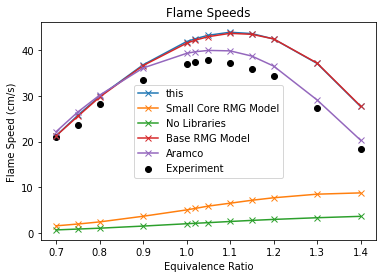

In [9]:
# plot the flame speed
plt.plot(equiv_ratios, new_speeds, marker='x')
plt.plot(equiv_ratios, small_core_rmg, marker='x')
plt.plot(equiv_ratios, naive_rmg, marker='x')
plt.plot(equiv_ratios, base_rmg, marker='x')
# plt.plot(equiv_ratios, changed_naive, marker='x')
# plt.plot(equiv_ratios, changed_base, marker='x')
plt.plot(equiv_ratios, aramco, marker='x')
plt.scatter(equiv_ratios, experiment, color='black')
plt.legend(['this','Small Core RMG Model', 'No Libraries', 'Base RMG Model', 'Aramco', 'Experiment'])
plt.title('Flame Speeds')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Flame Speed (cm/s)')
plt.savefig('flame_speed.png')

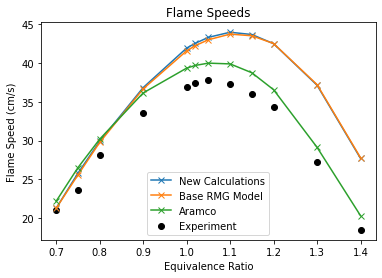

In [10]:
# plot the flame speed

plt.plot(equiv_ratios, new_speeds, marker='x')
plt.plot(equiv_ratios, base_rmg, marker='x')
# plt.plot(equiv_ratios, changed_naive, marker='x')
# plt.plot(equiv_ratios, changed_base, marker='x')
plt.plot(equiv_ratios, aramco, marker='x')
plt.scatter(equiv_ratios, experiment, color='black')
plt.legend(['New Calculations', 'Base RMG Model', 'Aramco', 'Experiment'])
plt.title('Flame Speeds')
plt.xlabel('Equivalence Ratio')
plt.ylabel('Flame Speed (cm/s)')
plt.savefig('flame_speed.png')

In [11]:
def get_error(points):
    return np.dot(points - experiment, points - experiment)

In [12]:
print('Base RMG Error:\t', get_error(base_rmg))
print('Aramco Error:\t', get_error(aramco))
print('New Calc Error:\t', get_error(new_speeds))

Base RMG Error:	 436.49584379935715
Aramco Error:	 61.687215462602076
New Calc Error:	 450.7942566195286
